# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint
## Not for grades

## Learning Objective

The objective of this experiment is to understand Decision tree classifier and overfitting

### Setup Steps

#### Importing the required packages

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import graphviz
from sklearn.tree import export_graphviz
import os
import warnings
warnings.filterwarnings('ignore')

#### Loading the data

In [0]:
C_data = pd.read_csv("C.csv").values

In [0]:
Testing_data =pd.read_csv("B.csv").values

To get more sense of data. let us plot the data

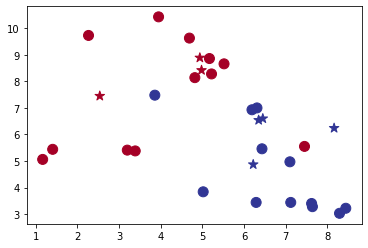

In [7]:
plt.scatter(C_data[:,0], C_data[:,1], c=C_data[:,2], cmap=plt.cm.RdYlBu, s=100)
plt.scatter(Testing_data[:,0], Testing_data[:,1], c=Testing_data[:,2], cmap=plt.cm.RdYlBu, marker="*", s=100)
plt.show()

In [0]:
# Parameters
n_classes = 2
plot_colors = "ryb"
plot_step = 0.02

In [0]:
Depth = 7

In [0]:
x_min, x_max = C_data[:, 0].min() - 1, C_data[:, 0].max() + 1
y_min, y_max = C_data[:, 1].min() - 1, C_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))
X = C_data[:, [0,1]]
y = C_data[:,2]

Training Accuracy: 0.88 Testing Accuracy: 1.0  At Depth: 1


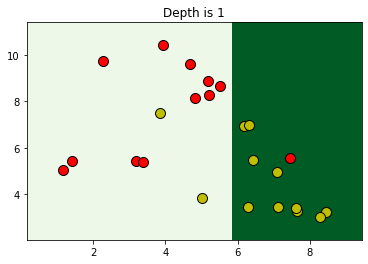

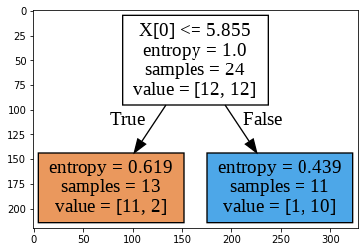

Training Accuracy: 0.92 Testing Accuracy: 1.0  At Depth: 2


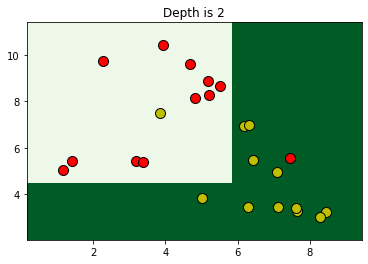

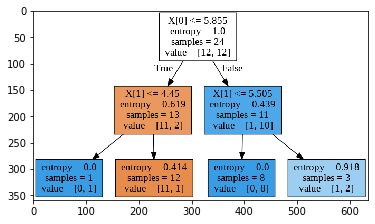

Training Accuracy: 0.96 Testing Accuracy: 0.86  At Depth: 3


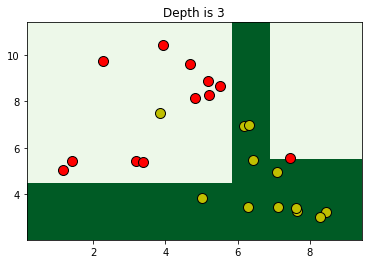

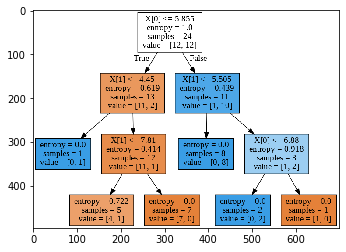

Training Accuracy: 1.0 Testing Accuracy: 0.86  At Depth: 4


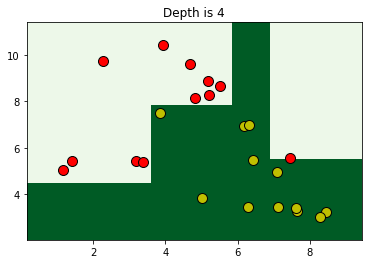

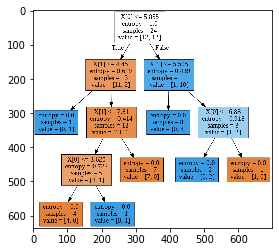

Training Accuracy: 1.0 Testing Accuracy: 0.86  At Depth: 5


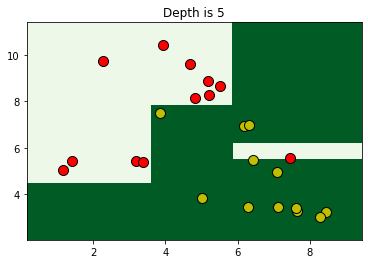

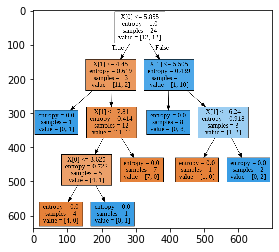

Training Accuracy: 1.0 Testing Accuracy: 0.86  At Depth: 6


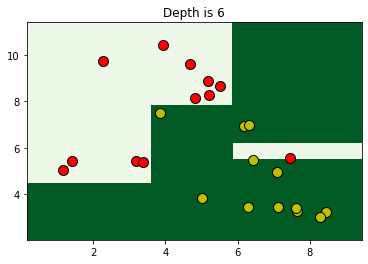

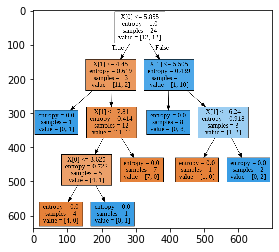

In [11]:

for depth in range(1,Depth):
    plt.grid(False)
    # Train
    clf = DecisionTreeClassifier(max_depth = depth,criterion='entropy').fit(X, y)
    print("Training Accuracy: "+str(round(accuracy_score(clf.predict(X),y),2)) + " " + "Testing Accuracy: " + str(round(accuracy_score(clf.predict(Testing_data[:,[0,1]]),Testing_data[:,2]),2)) + " " + " At Depth: " + str(depth))
    saveAs = "random_dt" + str(depth) 
    save_dot = saveAs + ".dot"
    save_png = saveAs + ".png"
    graph = graphviz.Source(export_graphviz(clf, out_file=save_dot
       , filled = True))
    os.system("dot -T png -o " + save_png + " " + save_dot)
    # Plot the decision boundary
    #plt.subplot(2, 3, depth)
    #plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Greens)
    plt.title("Depth is" + " " + str(depth))
    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color,cmap=plt.cm.RdYlBu, edgecolor='black', s=100)
        plt.grid(False)
        #Image(graph.create_png())
    plt.grid(False)
    plt.show()
    plt.grid(False)
    plt.imshow(plt.imread(save_png))
    plt.show()

In [0]:
A_data = pd.read_csv("A.csv").values

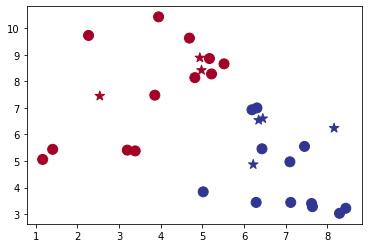

In [13]:
plt.scatter(A_data[:,0], A_data[:,1], c=A_data[:,2], cmap=plt.cm.RdYlBu, s=100)
plt.scatter(Testing_data[:,0], Testing_data[:,1], c=Testing_data[:,2], cmap=plt.cm.RdYlBu, marker="*", s=100)
plt.show()

In [0]:
x_min, x_max = A_data[:, 0].min() - 1, A_data[:, 0].max() + 1
y_min, y_max = A_data[:, 1].min() - 1, A_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))
XA = A_data[:, [0,1]]
yA = A_data[:,2]

Training Accuracy: 0.96 Testing Accuracy: 1.0  Given Max Depth: 1


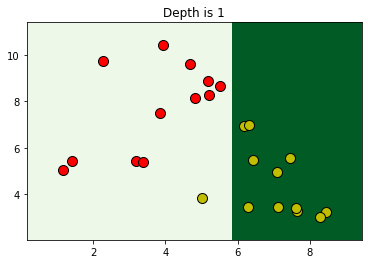

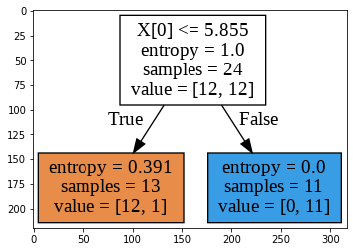

Training Accuracy: 1.0 Testing Accuracy: 1.0  Given Max Depth: 2


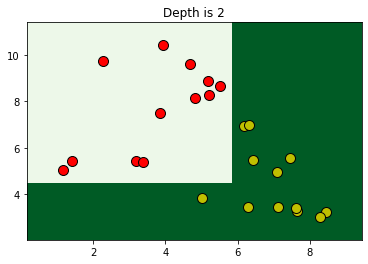

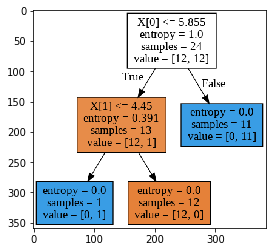

Training Accuracy: 1.0 Testing Accuracy: 1.0  Given Max Depth: 3


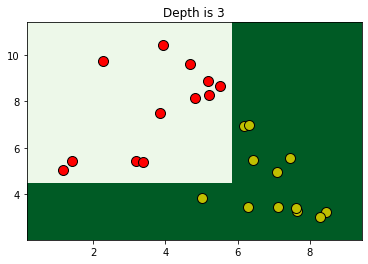

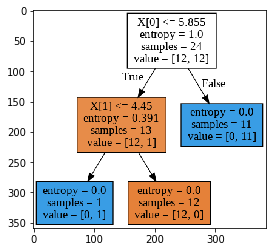

Training Accuracy: 1.0 Testing Accuracy: 1.0  Given Max Depth: 4


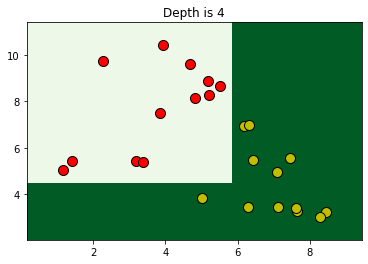

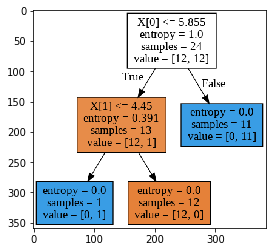

Training Accuracy: 1.0 Testing Accuracy: 1.0  Given Max Depth: 5


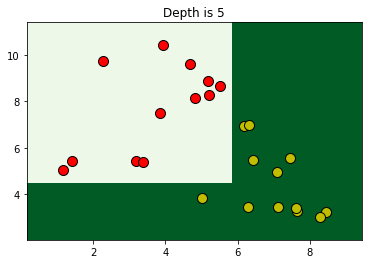

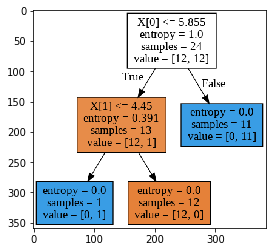

Training Accuracy: 1.0 Testing Accuracy: 1.0  Given Max Depth: 6


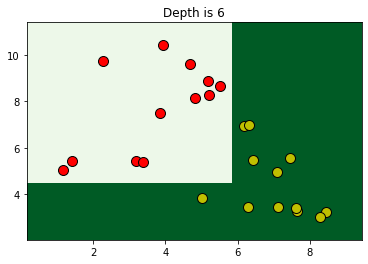

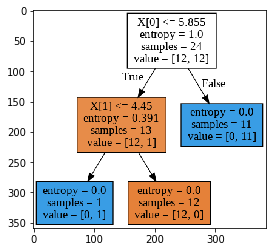

In [15]:
for depth in range(1,Depth):
    # Train
    clf = DecisionTreeClassifier(max_depth = depth,criterion='entropy').fit(XA, yA)
    print("Training Accuracy: "+str(round(accuracy_score(clf.predict(A_data[:,[0,1]]),A_data[:,2]),2)) + " " + "Testing Accuracy: " + str(round(accuracy_score(clf.predict(Testing_data[:,[0,1]]),Testing_data[:,2]),2)) + " " + " Given Max Depth: " + str(depth))
    saveAs = "random_dt" + str(depth) 
    save_dot = saveAs + ".dot"
    save_png = saveAs + ".png"
    graph = graphviz.Source(export_graphviz(clf, out_file=save_dot
       , filled = True))
    os.system("dot -T png -o " + save_png + " " + save_dot)
    # Plot the decision boundary
    #plt.subplot(2, 3, depth)
    #plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Greens)
    plt.title("Depth is" + " " + str(depth))
    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(yA == i)
        plt.scatter(XA[idx, 0], XA[idx, 1], c=color,cmap=plt.cm.RdYlBu, edgecolor='black', s=100)
        #Image(graph.create_png())
    plt.grid(False)    
    plt.show()
    plt.grid(False)
    plt.imshow(plt.imread(save_png))
    plt.show()

In [0]:
x_min, x_max = C_data[:, 0].min() - 1, C_data[:, 0].max() + 1
y_min, y_max = C_data[:, 1].min() - 1, C_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))
XC = C_data[:, [0,1]]
yC = C_data[:,2]

Training Accuracy: 0.88 Testing Accuracy: 1.0 Given Max Depth: 1


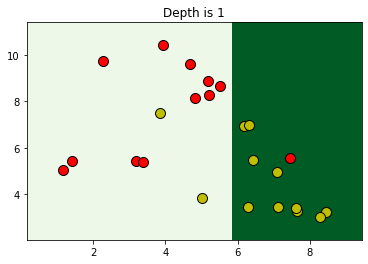

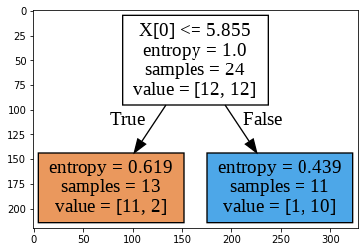

Training Accuracy: 0.92 Testing Accuracy: 1.0 Given Max Depth: 2


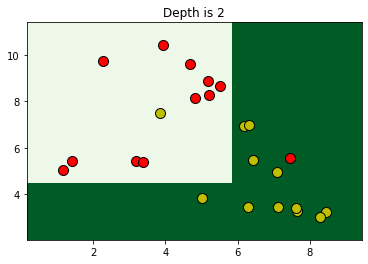

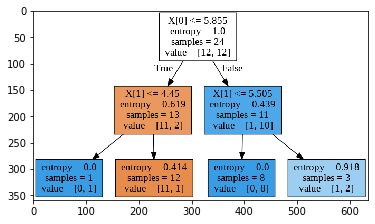

Training Accuracy: 0.96 Testing Accuracy: 0.86 Given Max Depth: 3


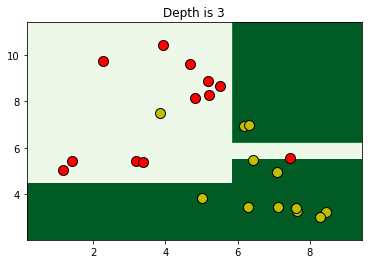

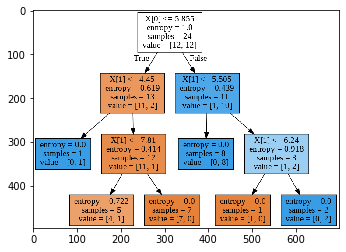

Training Accuracy: 1.0 Testing Accuracy: 0.71 Given Max Depth: 4


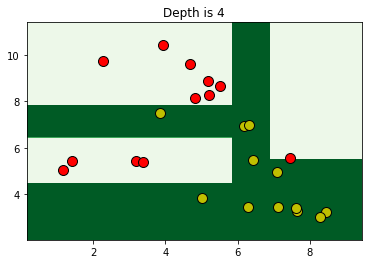

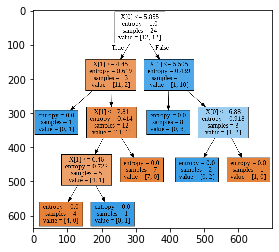

Training Accuracy: 1.0 Testing Accuracy: 0.71 Given Max Depth: 5


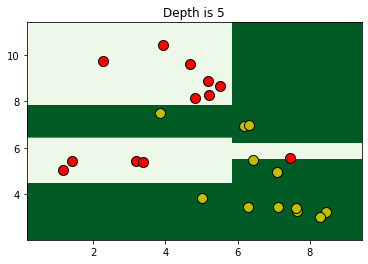

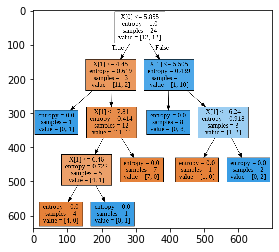

Training Accuracy: 1.0 Testing Accuracy: 0.86 Given Max Depth: 6


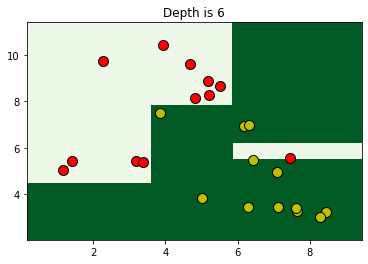

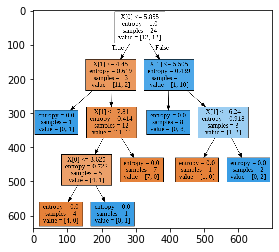

In [17]:
for depth in range(1,Depth):
    # Train
    clf = DecisionTreeClassifier(max_depth = depth, min_impurity_split = 0.2,criterion='entropy').fit(XC, yC)
    print("Training Accuracy: "+str(round(accuracy_score(clf.predict(C_data[:,[0,1]]),C_data[:,2]),2)) + " " + "Testing Accuracy: " + str(round(accuracy_score(clf.predict(Testing_data[:,[0,1]]),Testing_data[:,2]),2)) + " " + "Given Max Depth: " + str(depth))
    saveAs = "random_dt" + str(depth) 
    save_dot = saveAs + ".dot"
    save_png = saveAs + ".png"
    graph = graphviz.Source(export_graphviz(clf, out_file=save_dot
       , filled = True))
    os.system("dot -T png -o " + save_png + " " + save_dot)
    # Plot the decision boundary
    #plt.subplot(2, 3, depth)
    #plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Greens)
    plt.title("Depth is" + " " + str(depth))
    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(yC == i)
        plt.scatter(XC[idx, 0], XC[idx, 1], c=color,cmap=plt.cm.RdYlBu, edgecolor='black', s=100)
        #Image(graph.create_png())
    plt.grid(False)
    plt.show()
    plt.grid(False)
    plt.imshow(plt.imread(save_png))
    plt.show()